In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
owid = pd.read_csv('owid-covid-data.csv')
mobility = pd.read_csv('global_mobility_report.csv')

firstdatedf = owid[(owid.total_cases > 0)].groupby(['location']).first().reset_index()
firstdate = firstdatedf.loc[:,['location','date']]

stringency_index = firstdatedf.stringency_index

owid = owid.loc[owid.date == '11/27/20']
owid = owid.drop(columns = ['iso_code','new_cases','new_cases_smoothed','new_deaths','new_deaths_smoothed','new_cases_per_million',
                     'new_cases_smoothed_per_million','new_deaths_per_million','new_deaths_smoothed_per_million',
                     'weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions',
                     'weekly_hosp_admissions_per_million','new_tests','new_tests_per_thousand','new_tests_smoothed',
                     'new_tests_smoothed_per_thousand','reproduction_rate','icu_patients','icu_patients_per_million','hosp_patients',
                    'hosp_patients_per_million','total_tests','total_tests_per_thousand','tests_per_case','tests_units'],axis=1)
owid = owid.rename({'location':'country'},axis=1)
owid = owid[ ['country'] + [ col for col in owid.columns if col != 'country' ] ]

owid = pd.merge(owid,firstdate,left_on='country',right_on='location',how='left')
owid = owid.rename({'date_y':'first_case'},axis=1)
owid = owid.rename({'date_x':'date'},axis=1)
owid = owid.drop(columns = ['location'])
owid['date'] = owid['date'].astype('datetime64[ns]')
owid['first_case'] = owid['first_case'].astype('datetime64[ns]')
owid['days_since_firstcase'] = (owid.date - owid.first_case)
owid['days_since_firstcase'] = owid['days_since_firstcase'].dt.total_seconds() / (24 * 60 * 60)
owid['avg_daily_new_cases_per_million'] = (owid.total_cases_per_million / owid.days_since_firstcase)
owid['avg_daily_new_deaths_per_million'] = (owid.total_deaths_per_million / owid.days_since_firstcase)
owid.head()


/Users/faizankhan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,country,continent,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,positive_rate,stringency_index,population,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,first_case,days_since_firstcase,avg_daily_new_cases_per_million,avg_daily_new_deaths_per_million
0,Aruba,North America,2020-11-27,4791.0,45.0,44873.836,421.482,NaN,NaN,106766.0,...,NaN,NaN,NaN,NaN,76.29,NaN,2020-03-13,259.0,173.258054,1.627344
1,Afghanistan,Asia,2020-11-27,45402.0,1737.0,1166.297,44.620,NaN,NaN,38928341.0,...,NaN,NaN,37.746,0.50,64.83,0.498,2020-02-25,276.0,4.225714,0.161667
2,Angola,Africa,2020-11-27,14821.0,340.0,450.949,10.345,NaN,NaN,32866268.0,...,NaN,NaN,26.664,NaN,61.15,0.581,2020-03-22,250.0,1.803796,0.041380
3,Anguilla,North America,2020-11-27,4.0,NaN,266.631,NaN,NaN,NaN,15002.0,...,NaN,NaN,NaN,NaN,81.88,NaN,2020-03-27,245.0,1.088290,NaN
4,Albania,Europe,2020-11-27,35600.0,753.0,12370.561,261.658,NaN,NaN,2877800.0,...,7.1,51.2,NaN,2.89,78.57,0.785,2020-03-09,263.0,47.036354,0.994897


In [2]:
retail_rec_avg_change = mobility.loc[:,'retail_and_recreation_percent_change_from_baseline'].groupby(mobility.country_region).mean()
grocery_pharmacy_avg_change = mobility.loc[:,'grocery_and_pharmacy_percent_change_from_baseline'].groupby(mobility.country_region).mean()
parks_avg_change = mobility.loc[:,'parks_percent_change_from_baseline'].groupby(mobility.country_region).mean()
transit_station_avg_change = mobility.loc[:,'transit_stations_percent_change_from_baseline'].groupby(mobility.country_region).mean()
workplace_avg_change = mobility.loc[:,'workplaces_percent_change_from_baseline'].groupby(mobility.country_region).mean()
residential_avg_change = mobility.loc[:,'residential_percent_change_from_baseline'].groupby(mobility.country_region).mean()

retail_rec_peak_change = mobility.loc[:,'retail_and_recreation_percent_change_from_baseline'].groupby(mobility.country_region).min()
grocery_pharmacy_peak_change = mobility.loc[:,'grocery_and_pharmacy_percent_change_from_baseline'].groupby(mobility.country_region).min()
parks_peak_change = mobility.loc[:,'parks_percent_change_from_baseline'].groupby(mobility.country_region).min()
transit_station_peak_change = mobility.loc[:,'transit_stations_percent_change_from_baseline'].groupby(mobility.country_region).min()
workplace_peak_change = mobility.loc[:,'workplaces_percent_change_from_baseline'].groupby(mobility.country_region).min()
residential_peak_change = mobility.loc[:,'residential_percent_change_from_baseline'].groupby(mobility.country_region).max()

owid = pd.merge(owid,retail_rec_avg_change,left_on='country',right_on='country_region',how='left')
owid = pd.merge(owid,retail_rec_peak_change,left_on='country',right_on='country_region',how='left')
owid = pd.merge(owid,grocery_pharmacy_avg_change,left_on='country',right_on='country_region',how='left')
owid = pd.merge(owid,grocery_pharmacy_peak_change,left_on='country',right_on='country_region',how='left')
owid = pd.merge(owid,parks_avg_change,left_on='country',right_on='country_region',how='left')
owid = pd.merge(owid,parks_peak_change,left_on='country',right_on='country_region',how='left')
owid = pd.merge(owid,transit_station_avg_change,left_on='country',right_on='country_region',how='left')
owid = pd.merge(owid,transit_station_peak_change,left_on='country',right_on='country_region',how='left')
owid = pd.merge(owid,workplace_avg_change,left_on='country',right_on='country_region',how='left')
owid = pd.merge(owid,workplace_peak_change,left_on='country',right_on='country_region',how='left')
owid = pd.merge(owid,residential_avg_change,left_on='country',right_on='country_region',how='left')
owid = pd.merge(owid,residential_peak_change,left_on='country',right_on='country_region',how='left')

owid = owid.loc[:,~owid.columns.duplicated()]

owid = owid.rename({'retail_and_recreation_percent_change_from_baseline_x':'retail_rec_avg_change',
                    'retail_and_recreation_percent_change_from_baseline_y':'retail_rec_peak_change',
                   'grocery_and_pharmacy_percent_change_from_baseline_x': 'grocery_pharmacy_avg_change',
                   'grocery_and_pharmacy_percent_change_from_baseline_y': 'grocery_pharmacy_peak_change',
                    'parks_percent_change_from_baseline_x':'parks_avg_change' ,
                   'parks_percent_change_from_baseline_y':'parks_peak_change',
                   'transit_stations_percent_change_from_baseline_x':'transit_station_avg_change',
                   'transit_stations_percent_change_from_baseline_y':'transit_station_peak_change',
                    'workplaces_percent_change_from_baseline_x':'workplace_avg_change',
                   'workplaces_percent_change_from_baseline_y':'workplace_peak_change',
                   'residential_percent_change_from_baseline_x':'residential_avg_change',
                   'residential_percent_change_from_baseline_y':'residential_peak_change',},axis=1)
owid = owid.loc[:,~owid.columns.duplicated()]

owid['stringency_index'] = stringency_index
owid.columns



Index(['country', 'continent', 'date', 'total_cases', 'total_deaths',
       'total_cases_per_million', 'total_deaths_per_million', 'positive_rate',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'first_case',
       'days_since_firstcase', 'avg_daily_new_cases_per_million',
       'avg_daily_new_deaths_per_million', 'retail_rec_avg_change',
       'retail_rec_peak_change', 'grocery_pharmacy_avg_change',
       'grocery_pharmacy_peak_change', 'parks_avg_change', 'parks_peak_change',
       'transit_station_avg_change', 'transit_station_peak_change',
       'workplace_avg_change', 'workplace_peak_change',
       'residential_avg_change', 'residential_peak_change'],
      dtype='o

In [3]:
extra = pd.read_csv('testInfo.csv')
extrainfo = extra[['country','testspermillion','deathrate']].copy()
extrainfo.head()
owid = pd.merge(owid,extrainfo,on='country',how='left')
owid.columns

Index(['country', 'continent', 'date', 'total_cases', 'total_deaths',
       'total_cases_per_million', 'total_deaths_per_million', 'positive_rate',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'first_case',
       'days_since_firstcase', 'avg_daily_new_cases_per_million',
       'avg_daily_new_deaths_per_million', 'retail_rec_avg_change',
       'retail_rec_peak_change', 'grocery_pharmacy_avg_change',
       'grocery_pharmacy_peak_change', 'parks_avg_change', 'parks_peak_change',
       'transit_station_avg_change', 'transit_station_peak_change',
       'workplace_avg_change', 'workplace_peak_change',
       'residential_avg_change', 'residential_peak_change', 'testspermillio

In [4]:
owid = owid[['country', 'continent','first_case','total_cases_per_million', 'total_deaths_per_million', 'deathrate','testspermillion',
       'population', 'population_density', 'median_age',
        'aged_70_older', 'gdp_per_capita', 'extreme_poverty','stringency_index', 
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'days_since_firstcase', 'retail_rec_avg_change',
       'retail_rec_peak_change', 'grocery_pharmacy_avg_change',
       'grocery_pharmacy_peak_change', 'parks_avg_change', 'parks_peak_change',
       'transit_station_avg_change', 'transit_station_peak_change',
       'workplace_avg_change', 'workplace_peak_change',
       'residential_avg_change', 'residential_peak_change']]
owid.head()

,country,continent,first_case,total_cases_per_million,total_deaths_per_million,deathrate,testspermillion,population,population_density,median_age,...,grocery_pharmacy_avg_change,grocery_pharmacy_peak_change,parks_avg_change,parks_peak_change,transit_station_avg_change,transit_station_peak_change,workplace_avg_change,workplace_peak_change,residential_avg_change,residential_peak_change
0,Aruba,North America,2020-03-13,44873.836,421.482,0.842012,371453.0,106766.0,584.800,41.2,...,-10.984127,-96.0,-11.948413,-88.0,-46.023810,-92.0,-28.258303,-91.0,12.501961,35.0
1,Afghanistan,Asia,2020-02-25,1166.297,44.620,3.707906,3121.0,38928341.0,54.422,18.6,...,13.463768,-49.0,-3.363636,-52.0,-11.403471,-53.0,-13.689655,-72.0,6.202586,24.0
2,Angola,Africa,2020-03-22,450.949,10.345,2.628413,2567.0,32866268.0,23.890,16.8,...,-9.285000,-50.0,-11.775794,-72.0,-36.749057,-76.0,-11.706605,-77.0,13.202166,38.0
3,Anguilla,North America,2020-03-27,266.631,NaN,NaN,88317.0,15002.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,Europe,2020-03-09,12370.561,261.658,2.438323,41999.0,2877800.0,104.871,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


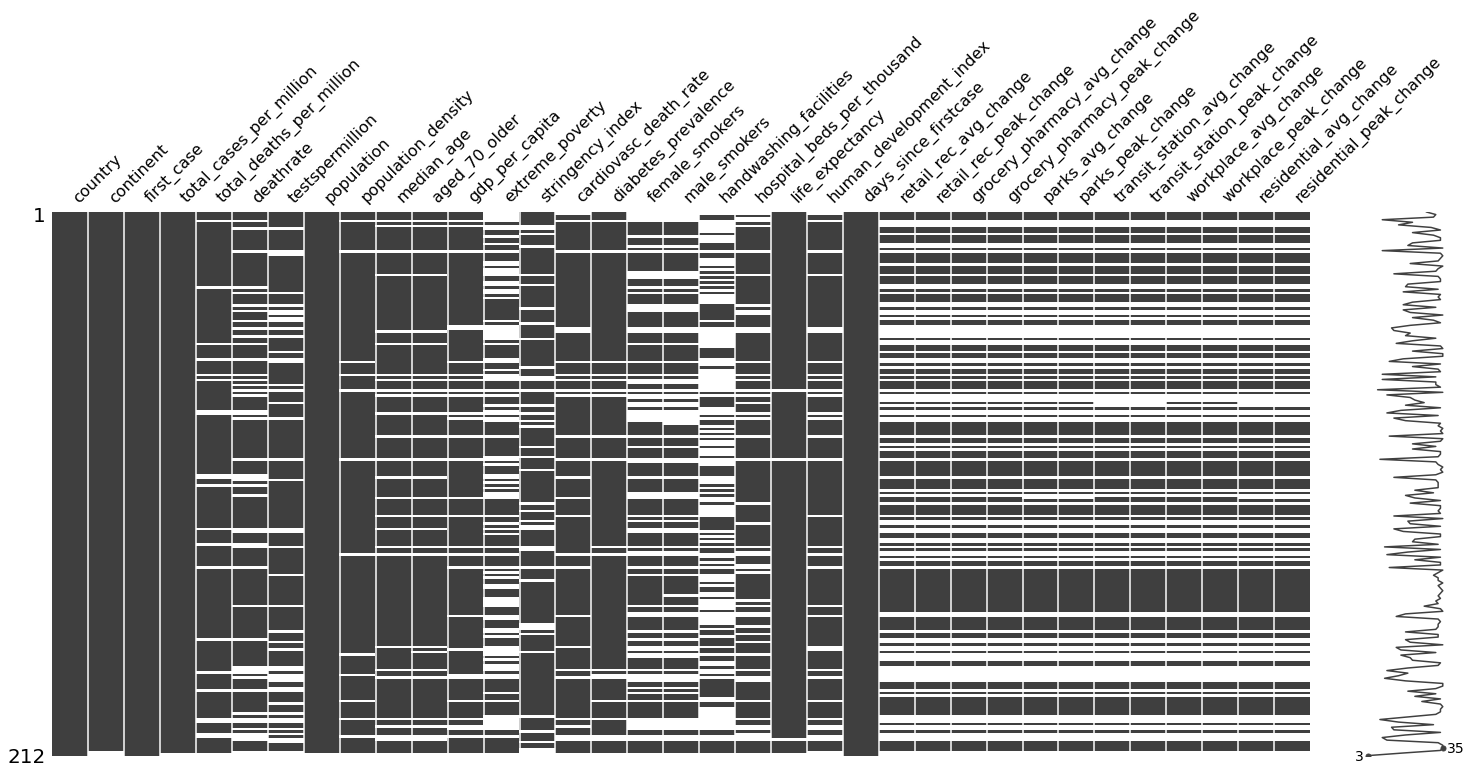

In [5]:
import missingno as msno
%matplotlib inline
msno.matrix(owid)

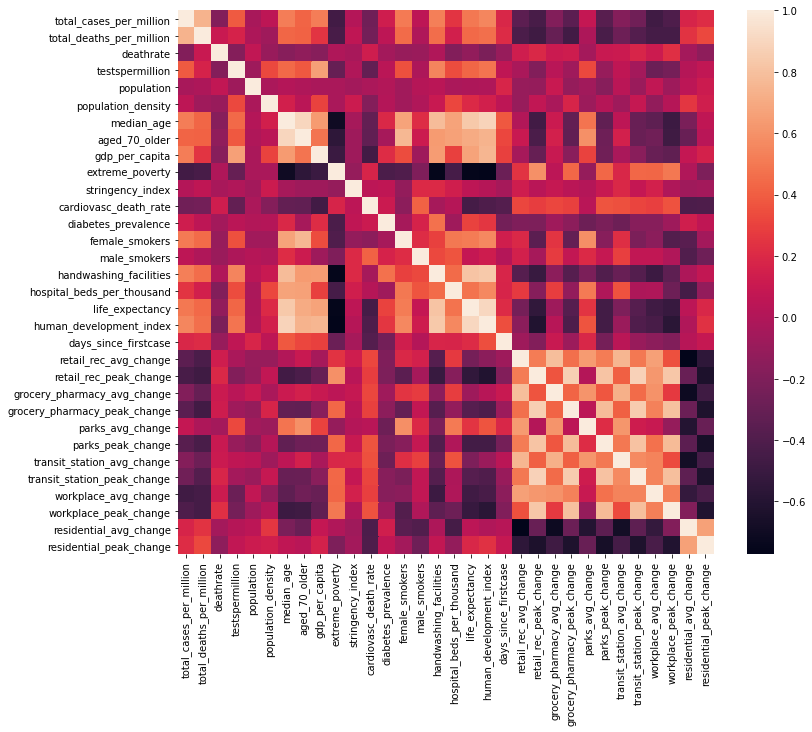

In [6]:
import seaborn as sns
plt.subplots(figsize=(12,10))
sns.heatmap(owid.corr())

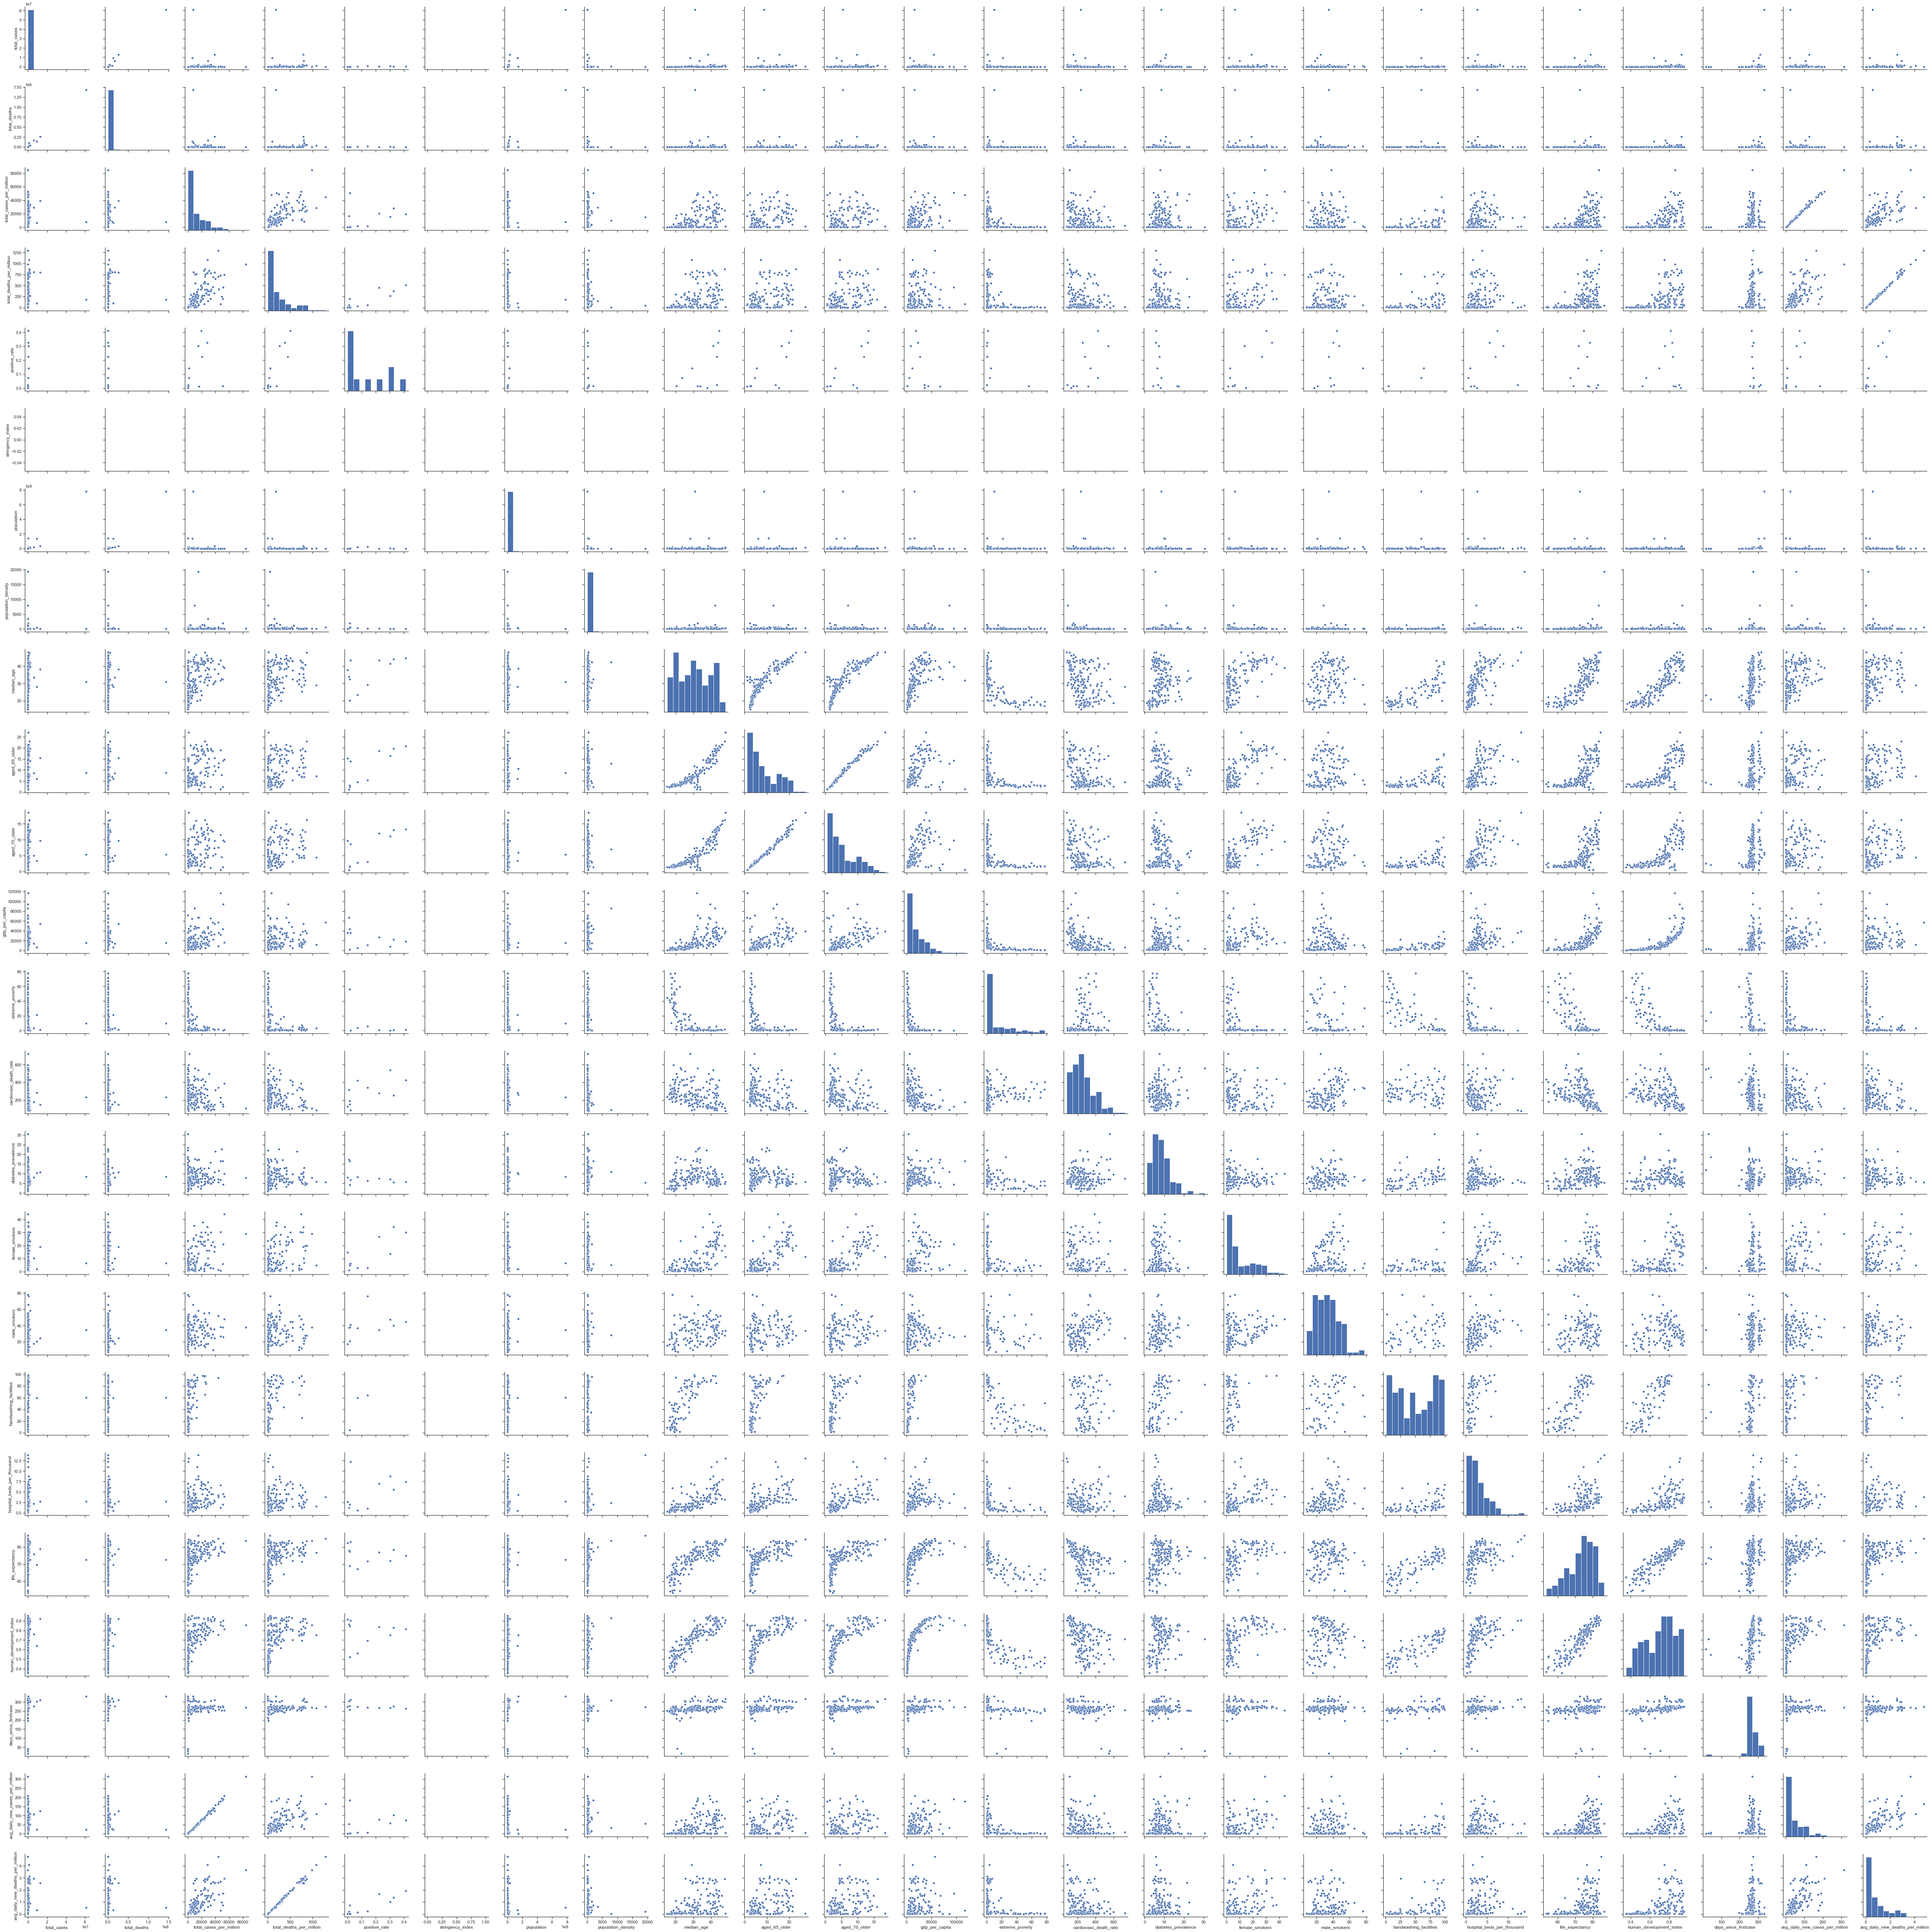

In [6]:
%matplotlib inline

from IPython.display import display, HTML
CSS = """div.output_area img {max-width:None !important;max-height: None !important";}"""
display(HTML('<style>{}</style>'.format(CSS)))

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(owid,height = 3)
plt.show()

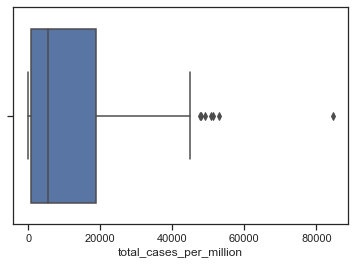

In [23]:
sns.boxplot(x=owid["total_cases_per_million"])

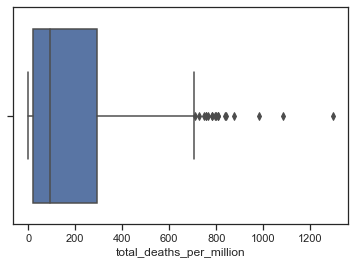

In [27]:
sns.boxplot(x=owid["total_deaths_per_million"])

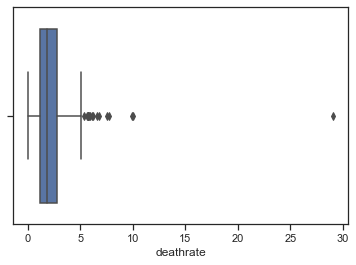

In [28]:
sns.boxplot(x=owid['deathrate'])

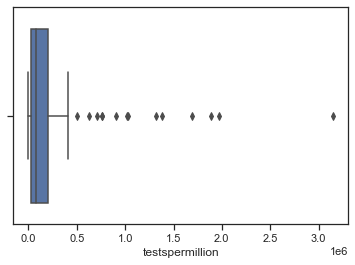

In [29]:
sns.boxplot(x=owid['testspermillion'])

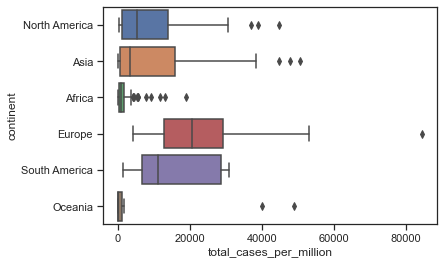

In [30]:
sns.boxplot(x="total_cases_per_million",y="continent",data=owid)

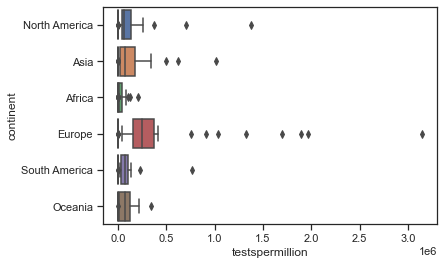

In [31]:
sns.boxplot(x="total_deaths_per_million",y="continent",data=owid)

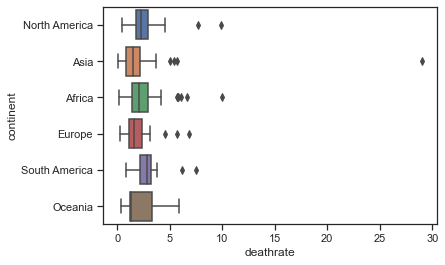

In [32]:
sns.boxplot(x="deathrate",y="continent",data=owid)

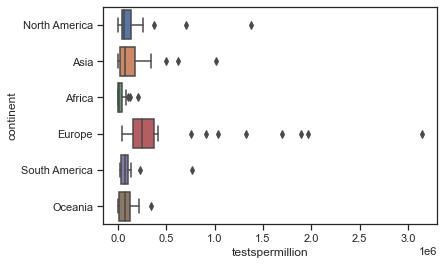

In [33]:
sns.boxplot(x="testspermillion",y="continent",data=owid)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ea610d0>,
      dtype=object)

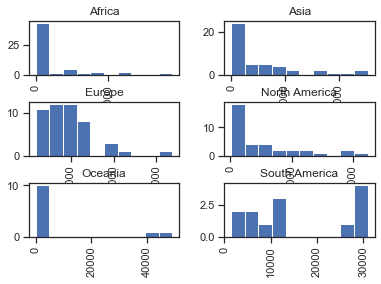

In [36]:
owid['total_cases_per_million'].hist(by=owid['continent'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1473dcb20>,
      dtype=object)

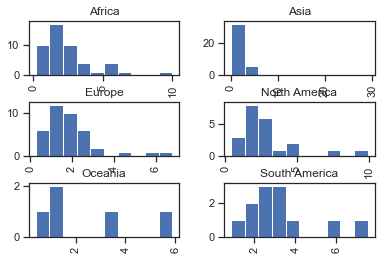

In [37]:
owid['deathrate'].hist(by=owid['continent'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ea61c70>,
      dtype=object)

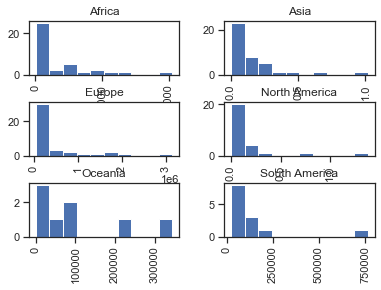

In [38]:
owid['testspermillion'].hist(by=owid['continent'])